In [1]:
import numpy as np
import os 
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy
from scipy.stats import norm
from IPython.display import display, Math
from scipy import stats
from scipy.stats import pearsonr

path = os.getcwd()

In [2]:
df = pd.read_csv(path+'\Datos\Test_1_Cryo.csv')

temp_50K = np.array(df.iloc[2:,7]).astype(float)
temp_3K = np.array(df.iloc[2:,8]).astype(float)
temp_GGG = np.array(df.iloc[2:,5]).astype(float)
temp_FAA = np.array(df.iloc[2:,3]).astype(float)
time = np.array(df.iloc[2:,2]).astype(float)

# Se eliminan los valores 0 del sensor de 1K
index = np.where(temp_GGG < 0.001)
temp_GGG_remove = np.delete(temp_GGG,index)
time_remove = np.delete(time,index)


plt.rcParams.update({'axes.labelsize': 15, 'axes.titlesize': 15, 
              'legend.fontsize':13, 'font.family': ['sans-serif'] })

C:\Users\smunoz-ext\AppData\Local\Temp\ipykernel_5568\1243411723.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+'\Datos\Test_1_Cryo.csv')


Se determina la estabilidad (desviación estandar) de la etapa FAA en cada temperatura de control seleccionada. 

Primero, se obtienen los límites visualmente, y después se estima la desviación estandar de los datos que se tienen en dicho rango.

Tanto al inicio como al final del control, la temperatura se va a cero, cosa del sensor    ---->    se eliminan los valores menores a 0,028K que es la temperatura base (¿según fabricante?)

In [3]:
# Se eliminan los valores menores a 0,028K del sensor de 1K
index = np.where(temp_FAA < 0.028)
temp_FAA_remove = np.delete(temp_FAA,index)
time_remove2 = np.delete(time,index)

### First control cycle

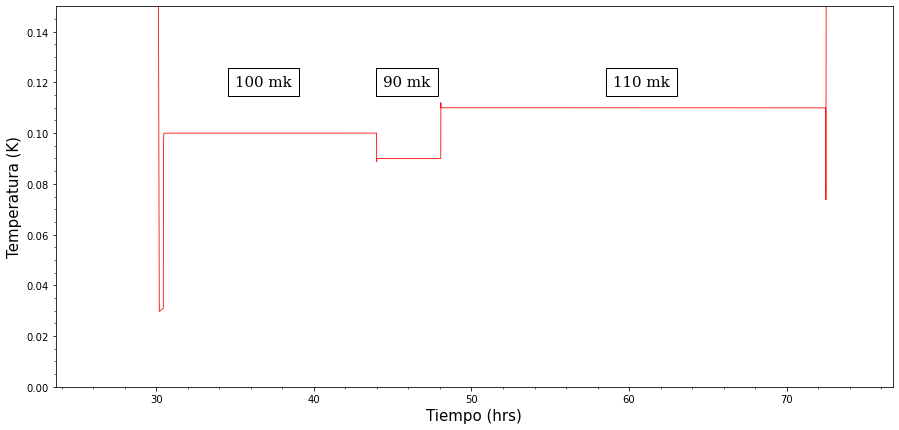

In [4]:
i, j = 10000, 93000

fig, ax = plt.subplots(figsize=(15, 7))

plt.plot(time_remove2[i:j],temp_FAA_remove[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  

plt.text(35,0.123, '100 mk', 
         fontsize=15, color='black', fontfamily='serif',
         bbox ={'facecolor':'white','pad':7},
         verticalalignment ='top', horizontalalignment ='left')
plt.text(44.4,0.123, '90 mk', 
         fontsize=15, color='black', fontfamily='serif',
         bbox ={'facecolor':'white','pad':7},
         verticalalignment ='top', horizontalalignment ='left')
plt.text(59,0.123, '110 mk', 
         fontsize=15, color='black', fontfamily='serif',
         bbox ={'facecolor':'white','pad':7},
         verticalalignment ='top', horizontalalignment ='left')

plt.minorticks_on()  
plt.ylim(0,0.15)
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Temperatura (K)')
plt.show()


##### 100 mk

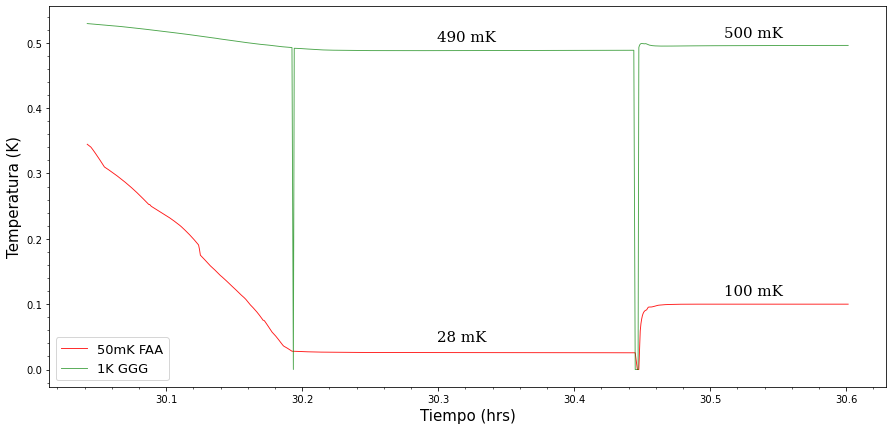

In [5]:
fig, ax = plt.subplots(figsize=(15,7))

i, j = 16100, 17000
k1 = 16765

plt.plot(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='50mK FAA')  
plt.plot(time[i:j],temp_GGG[i:j], color='green', alpha=0.7, linewidth=0.9, label='1K GGG')  
plt.minorticks_on()
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Temperatura (K)')
plt.legend(loc='lower left')


plt.text(30.299,0.06, '28 mK', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')
plt.text(30.51,0.13, '100 mK', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.text(30.299,0.52, '490 mK', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')
plt.text(30.51,0.525, '500 mK', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()


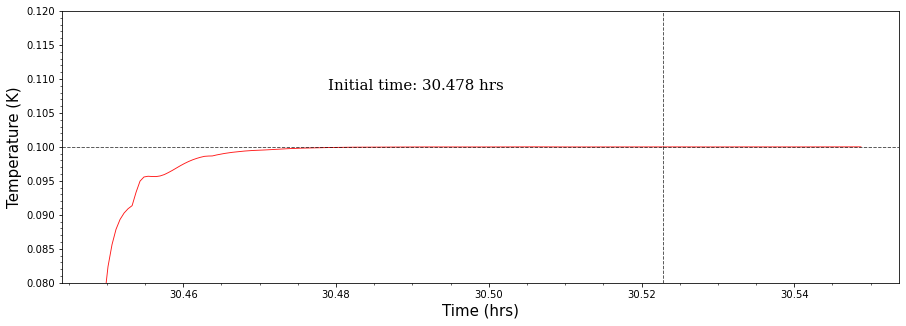

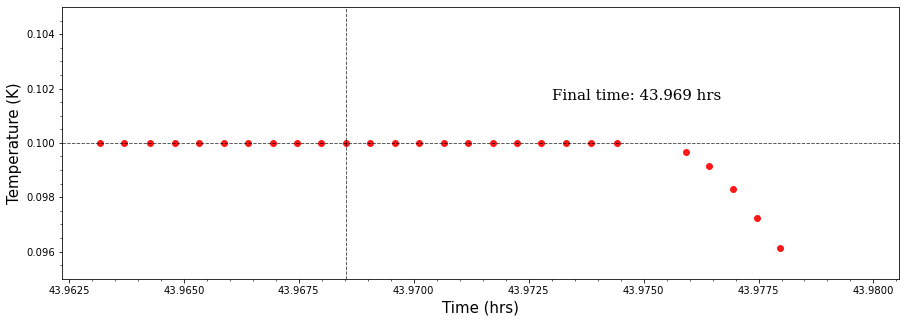

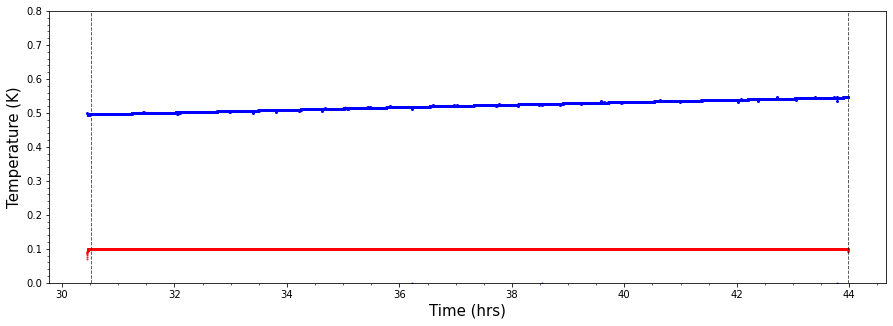

In [6]:
fig, ax = plt.subplots(figsize=(15,5))

i, j = 16710, 16900
k1 = 16850

plt.plot(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=0.1, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
plt.ylim(0.08,0.12)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(30.479,0.11, 'Initial time: '+str(round(time[16765],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

##########################

fig, ax = plt.subplots(figsize=(15,5))

i, j = 42070, 42100
k2 = 42080

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=0.1, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
plt.ylim(0.095,0.105)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(43.973,0.102, 'Final time: '+str(round(time[k2],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

##########################

fig, ax = plt.subplots(figsize=(15,5))

i, j = 16710, 42100

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.6, s=1.5, label='50mK (FAA)')  
plt.scatter(time[i:j],temp_GGG[i:j], color='b', alpha=0.6, s=1.5, label='1K (GGG)')  
plt.axvline(time[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axvline(time[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
plt.ylim(0.,0.800)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.show()

In [7]:
k1 = 16800
k2 = 42080

temp_FAA_100mk_1 = temp_FAA[k1:k2]
mu_100mk_1, sigma_100mk_1 = scipy.stats.norm.fit(temp_FAA_100mk_1)

display(Math(r'$\mu: {}\, k \\ \sigma: {} \, k$'.format(mu_100mk_1, sigma_100mk_1)))


<IPython.core.display.Math object>

In [8]:
mu_GGG, sigma_GGG = scipy.stats.norm.fit(temp_GGG[k1:k2])
mu_3k, sigma_3k = scipy.stats.norm.fit(temp_3K[k1:k2]) 
mu_50K, sigma_50K = scipy.stats.norm.fit(temp_50K[k1:k2])

print(sigma_GGG, sigma_3k, sigma_50K)

0.015648109696658967 0.017667073574270803 0.09340416351333146


##### 90 mk

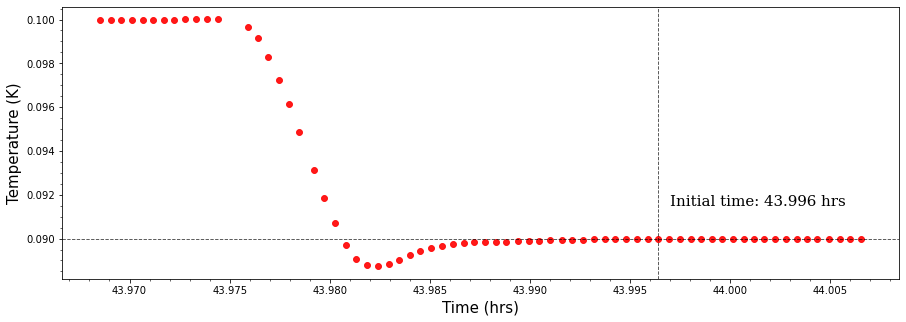

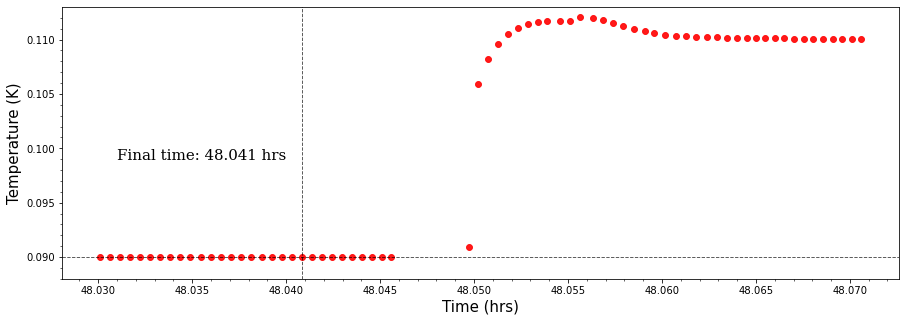

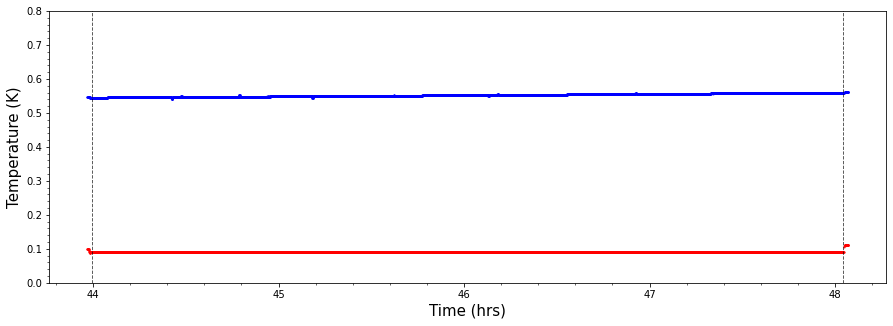

In [9]:
fig, ax = plt.subplots(figsize=(15,5))

i, j = 42080, 42150
k1 = 42130

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=0.09, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
#plt.ylim(0.085,0.095)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(43.997,0.092, 'Initial time: '+str(round(time[k1],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

##########################

fig, ax = plt.subplots(figsize=(15,5))

i, j = 49650, 49720
k2 = 49670

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=0.09, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
plt.ylim(0.088,0.113)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(48.031,0.1, 'Final time: '+str(round(time[k2],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

##########################

fig, ax = plt.subplots(figsize=(15,5))

i, j = 42080, 49720

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.6, s=1.5, label='50mK (FAA)')  
plt.scatter(time[i:j],temp_GGG[i:j], color='b', alpha=0.6, s=1.5, label='1K (GGG)')  
plt.axvline(time[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axvline(time[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
plt.ylim(0.,0.800)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.show()

Se observa un gap sin datos, probablemente debido al cambio de registro que se hace cuando se modifica la temperatura de control. El de la segunda gráfica es más evidente

In [10]:
k1 = 42150
k2 = 49650

temp_FAA_90mk_1 = temp_FAA[k1:k2]
mu_90mk_1, sigma_90mk_1 = scipy.stats.norm.fit(temp_FAA_90mk_1)

display(Math(r'$\mu: {}\, k \\ \sigma: {} \, k$'.format(mu_90mk_1, sigma_90mk_1)))


<IPython.core.display.Math object>

In [11]:
mu_GGG, sigma_GGG = scipy.stats.norm.fit(temp_GGG[k1:k2])
mu_3k, sigma_3k = scipy.stats.norm.fit(temp_3K[k1:k2]) 
mu_50K, sigma_50K = scipy.stats.norm.fit(temp_50K[k1:k2])

print(sigma_GGG, sigma_3k, sigma_50K)

0.004290571572399337 0.017042026677077545 0.028072721924474936


##### 110 mk

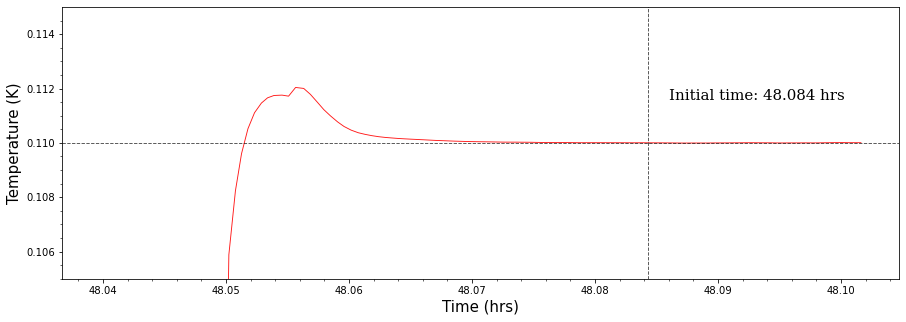

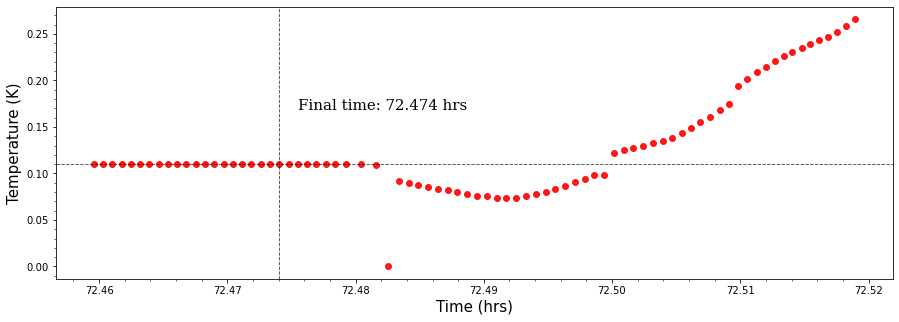

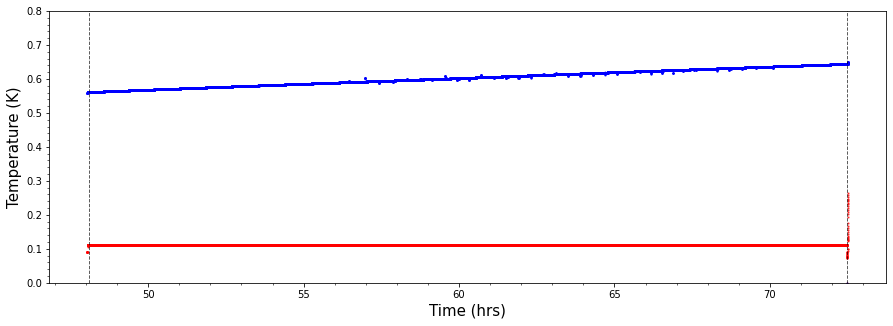

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

i, j = 49668, 49780
k1 = 49745

plt.plot(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=0.11, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
plt.ylim(0.105,0.115)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(48.086,0.112, 'Initial time: '+str(round(time[k1],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

##########################

fig, ax = plt.subplots(figsize=(15,5))

i, j = 90640, 90720
k2 = 90660

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=0.11, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
#plt.ylim(0.105,0.115)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(72.4755,0.18, 'Final time: '+str(round(time[k2],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

##########################

fig, ax = plt.subplots(figsize=(15,5))

i, j = 49668, 90720

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.6, s=1.5, label='50mK (FAA)')  
plt.scatter(time[i:j],temp_GGG[i:j], color='b', alpha=0.6, s=1.5, label='1K (GGG)')  
plt.axvline(time[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axvline(time[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
plt.ylim(0.,0.800)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.show()

In [13]:
k1 = 49745
k2 = 90660

temp_FAA_110mk_1 = temp_FAA[k1:k2]
mu_110mk_1, sigma_110mk_1 = scipy.stats.norm.fit(temp_FAA_110mk_1)

display(Math(r'$\mu: {}\, k \\ \sigma: {} \, k$'.format(mu_110mk_1, sigma_110mk_1)))

<IPython.core.display.Math object>

In [14]:
mu_GGG, sigma_GGG = scipy.stats.norm.fit(temp_GGG[k1:k2])
mu_3k, sigma_3k = scipy.stats.norm.fit(temp_3K[k1:k2]) 
mu_50K, sigma_50K = scipy.stats.norm.fit(temp_50K[k1:k2])

print(sigma_GGG, sigma_3k, sigma_50K)

0.023455482702823337 0.017085330941320986 0.11424145382063824


### Second control cycle

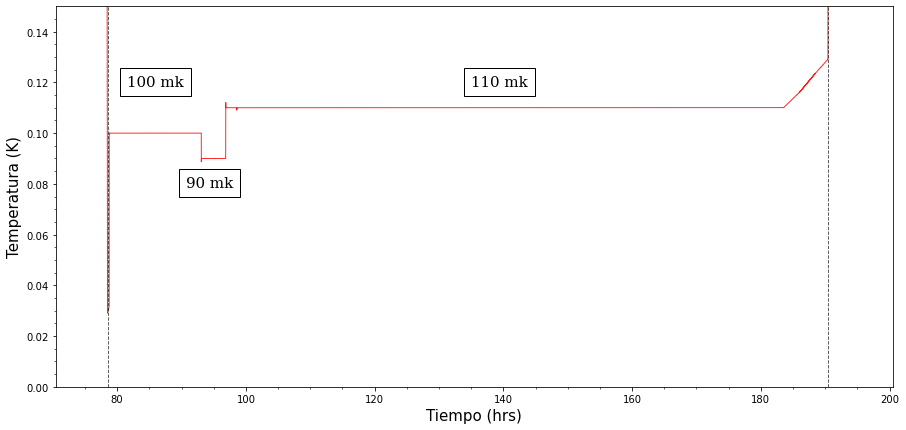

In [15]:
i, j = 96000, 260000

fig, ax = plt.subplots(figsize=(15, 7))

plt.plot(time_remove2[i:j],temp_FAA_remove[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  

plt.text(81.5,0.123, '100 mk', 
         fontsize=15, color='black', fontfamily='serif',
         bbox ={'facecolor':'white','pad':7},
         verticalalignment ='top', horizontalalignment ='left')
plt.text(90.7,0.083, '90 mk', 
         fontsize=15, color='black', fontfamily='serif',
         bbox ={'facecolor':'white','pad':7},
         verticalalignment ='top', horizontalalignment ='left')
plt.text(135,0.123, '110 mk', 
         fontsize=15, color='black', fontfamily='serif',
         bbox ={'facecolor':'white','pad':7},
         verticalalignment ='top', horizontalalignment ='left')

plt.axvline(78.5, ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axvline(190.5, ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')

plt.minorticks_on()  
plt.ylim(0,0.15)
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Temperatura (K)')
plt.show()

#### 100 mk

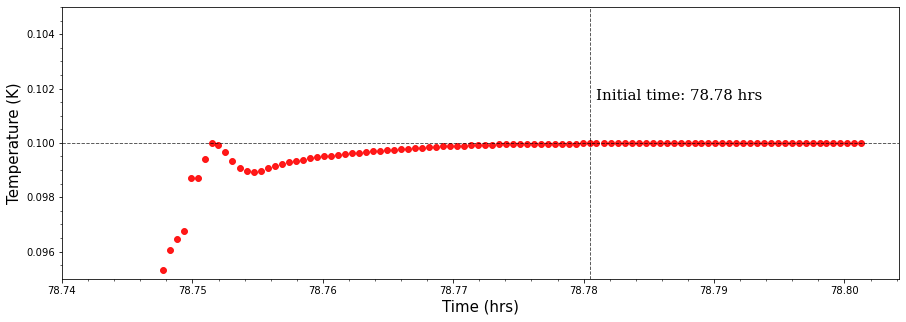

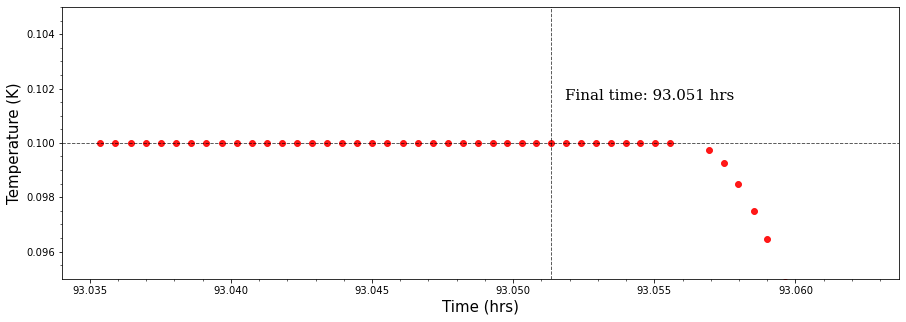

In [16]:
fig, ax = plt.subplots(figsize=(15,5))

temp = 0.1
i, j = 99940, 100050
k1 = 100010

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=temp, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
plt.ylim(temp-0.005,temp+0.005)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(time[k1]+0.0005,temp+0.002, 'Initial time: '+str(round(time[k1],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

##########################

fig, ax = plt.subplots(figsize=(15,5))

temp = 0.1
i, j = 126630, 126680
k2 = 126660

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=temp, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
plt.ylim(temp-0.005,temp+0.005)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(time[k2]+0.0005,temp+0.002, 'Final time: '+str(round(time[k2],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()


In [17]:
k1 = 100010
k2 = 126660

temp_FAA_100mk_2 = temp_FAA[k1:k2]
mu_100mk_2, sigma_100mk_2 = scipy.stats.norm.fit(temp_FAA_100mk_2)

display(Math(r'$\mu: {}\, k \\ \sigma: {} \, k$'.format(mu_100mk_2, sigma_100mk_2)))

<IPython.core.display.Math object>

In [18]:
mu_GGG, sigma_GGG = scipy.stats.norm.fit(temp_GGG[k1:k2])
mu_3k, sigma_3k = scipy.stats.norm.fit(temp_3K[k1:k2]) 
mu_50K, sigma_50K = scipy.stats.norm.fit(temp_50K[k1:k2])

print(sigma_GGG, sigma_3k, sigma_50K)

0.014960816605908816 0.018007792554896217 0.2325744068732099


#### 90 mk

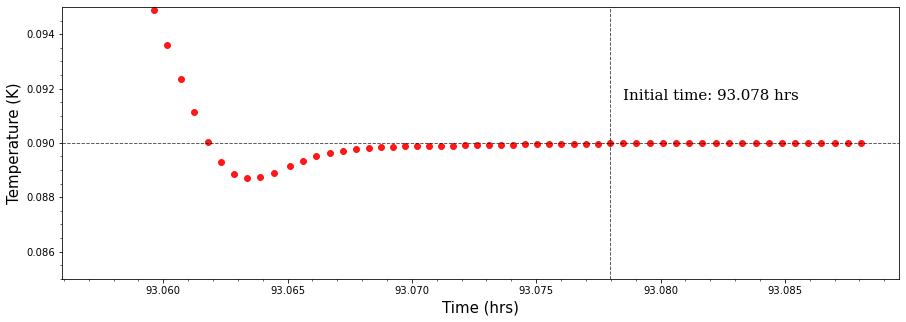

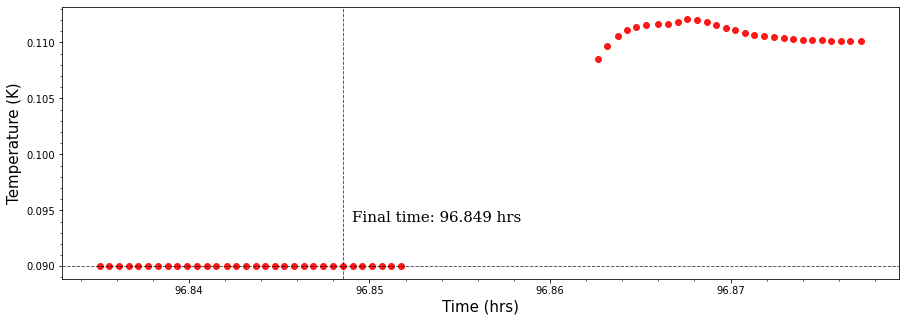

In [19]:
fig, ax = plt.subplots(figsize=(15,5))

temp = 0.09
i, j = 126670, 126730
k1 = 126710

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=temp, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
plt.ylim(temp-0.005,temp+0.005)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(time[k1]+0.0005,temp+0.002, 'Initial time: '+str(round(time[k1],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

##########################

fig, ax = plt.subplots(figsize=(15,5))

temp = 0.09
i, j = 133730, 133790
k2 = 133755

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=temp, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
#plt.ylim(temp-0.005,temp+0.005)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(time[k2]+0.0005,temp+0.005, 'Final time: '+str(round(time[k2],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

In [20]:
k1 = 126730
k2 = 133740

temp_FAA_90mk_2 = temp_FAA[k1:k2]
mu_90mk_2, sigma_90mk_2 = scipy.stats.norm.fit(temp_FAA_90mk_2)

display(Math(r'$\mu: {}\, k \\ \sigma: {} \, k$'.format(mu_90mk_2, sigma_90mk_2)))

<IPython.core.display.Math object>

In [21]:
mu_GGG, sigma_GGG = scipy.stats.norm.fit(temp_GGG[k1:k2])
mu_3k, sigma_3k = scipy.stats.norm.fit(temp_3K[k1:k2]) 
mu_50K, sigma_50K = scipy.stats.norm.fit(temp_50K[k1:k2])

print(sigma_GGG, sigma_3k, sigma_50K)

0.0037462542028285453 0.016864402242215863 0.048404271344632134


##### 110 mk

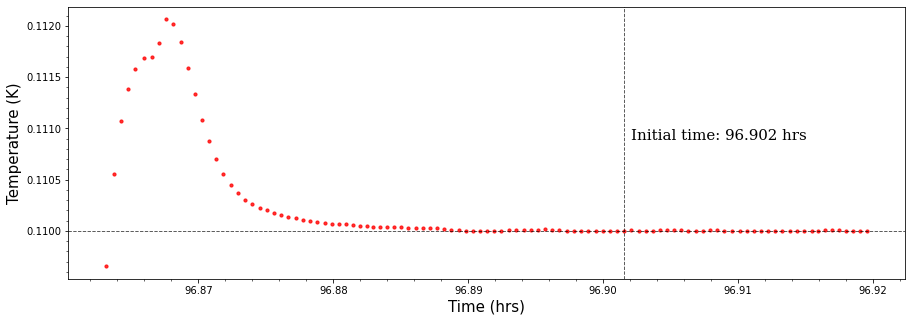

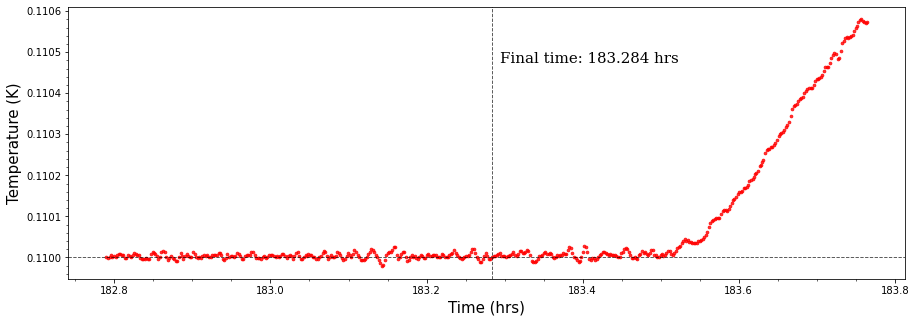

In [22]:
fig, ax = plt.subplots(figsize=(15,5))

temp = 0.11
i, j = 133763,133870
k1 = 133835

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.8, s=10, label='100mK (FAA)')  
plt.axvline(time[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=temp, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
#plt.ylim(temp-0.005,temp+0.005)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(time[k1]+0.0005,temp+0.001, 'Initial time: '+str(round(time[k1],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

##########################

fig, ax = plt.subplots(figsize=(15,5))

temp = 0.11   
#i, j = 258465, 258505
i, j = 254500, 255000
#k2 = 258486
k2 = 254750

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.8, s=7, label='100mK (FAA)')  
plt.axvline(time[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=temp, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
#plt.ylim(temp-0.005,0.15)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(time[k2]+0.01,temp+0.0005, 'Final time: '+str(round(time[k2],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()


Se observa que sobre las 183.5 horas aprox la temperatura (que se ve previamente muy inestable) comienza a subir, se mantiene lineal hasta +- 0.13 K y vuelve a subir en lo que ya parece el warm-up


In [26]:
k1 = 133835
k2 = 254750

temp_FAA_110mk_2 = temp_FAA[k1:k2]
mu_110mk_2, sigma_110mk_2 = scipy.stats.norm.fit(temp_FAA_110mk_2)

display(Math(r'$\mu: {}\, k \\ \sigma: {} \, k$'.format(mu_110mk_2, sigma_110mk_2)))

<IPython.core.display.Math object>

In [27]:
mu_GGG, sigma_GGG = scipy.stats.norm.fit(temp_GGG[k1:k2])
mu_3k, sigma_3k = scipy.stats.norm.fit(temp_3K[k1:k2]) 
mu_50K, sigma_50K = scipy.stats.norm.fit(temp_50K[k1:k2])

print(sigma_GGG, sigma_3k, sigma_50K)

0.0751121877385287 0.017749393644254506 0.18821071017696853


En este caso la temperatura resulta mucho menos estable porque ya no se puede hacer que las partículas se desordenen a la suficiente rapidez como para mantenerla, porque no quedan suficientes. 

Voy a ver la estabilidad en distintos rangos de este ultimo control


In [29]:
n = 35

t = np.array_split(time[k1:k2],n)
T = np.array_split(temp_FAA_110mk_2,n)

for i in range(n):
    mu, sigma = scipy.stats.norm.fit(T[i])
    
    print('Inicio (hrs):',t[i][0])
    print(mu, sigma)
    print()

Inicio (hrs): 96.901551
0.11000048538350217 1.7841957832473683e-05

Inicio (hrs): 98.757287
0.11000081186685963 4.997241307232808e-06

Inicio (hrs): 100.588928
0.11000077510853835 4.240261143909202e-06

Inicio (hrs): 102.418309
0.11000074819102751 4.112841285842852e-06

Inicio (hrs): 104.245441
0.11000080926193923 4.123818205239218e-06

Inicio (hrs): 106.068924
0.11000074500723589 3.827781429613943e-06

Inicio (hrs): 107.890566
0.11000070043415341 4.447310097721704e-06

Inicio (hrs): 109.713437
0.11000071085383502 4.212109308664629e-06

Inicio (hrs): 111.85331
0.11000068277858177 4.031652095374149e-06

Inicio (hrs): 114.388815
0.11000067670043415 3.911609289224327e-06

Inicio (hrs): 116.935101
0.11000063502170766 4.111146204917533e-06

Inicio (hrs): 119.484012
0.11000068162083936 4.80839181179381e-06

Inicio (hrs): 121.987626
0.11000063820549928 4.2659000904280475e-06

Inicio (hrs): 124.445581
0.11000064457308249 4.354199720785663e-06

Inicio (hrs): 126.861378
0.1100006515195369 4.1735

Se observa que de hecho la peor parte es al principio del control: está un par de horas con mucha inestabilidad (aprox, variando el valor de n) ->> RARO

Luego tiene un periodo de tiempo donde la estbilidad es muy buena y a partir de las 162 horas aprox comienza a empeorar, aunque suele ser igualmente menor a 5 micro K

Miro lo de las primeras dos horas, porque a simple vista no se aprecia nada raro

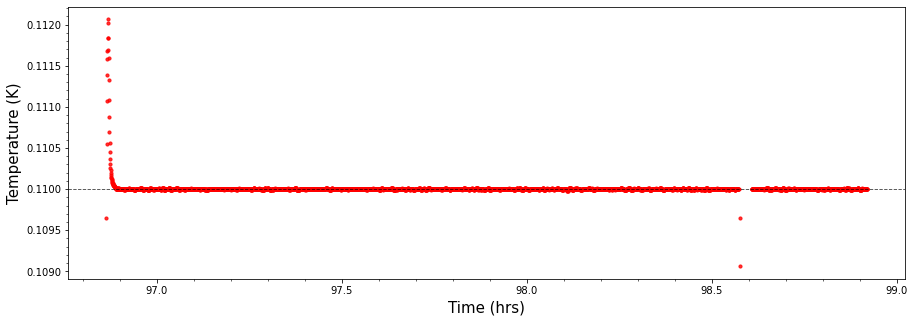

In [30]:
fig, ax = plt.subplots(figsize=(15,5))

temp = 0.11
i, j = 133763, 137600 

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.8, s=10, label='100mK (FAA)')  
plt.axhline(y=temp, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()

plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')


plt.show()


Se ve una bajada rara ahí, justo además a la hora donde la STD da mala.

Elimino ese outlier, determinmo de nuevo la estabilidad, y me quedo con esa.

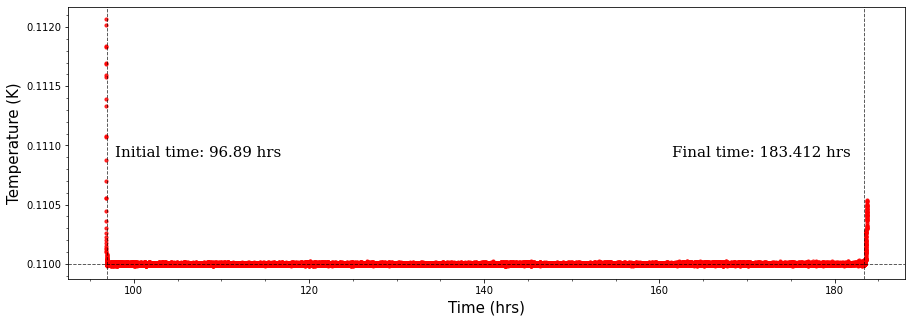

In [33]:
index = np.where(temp_FAA < 0.1098)
temp_FAA_remove2 = np.delete(temp_FAA,index)
time_removeFAA2 = np.delete(time,index)

fig, ax = plt.subplots(figsize=(15,5))

temp = 0.11
i, j = 66080, 187300 
k1 = 66130
k2 = 187130

plt.scatter(time_removeFAA2[i:j],temp_FAA_remove2[i:j], color='red', alpha=0.8, s=10, label='100mK (FAA)')  
plt.axvline(time_removeFAA2[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axvline(time_removeFAA2[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=temp, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.text(time_removeFAA2[k1]+1,temp+0.001, 'Initial time: '+str(round(time_removeFAA2[k1],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.text(time_removeFAA2[k2]-22,temp+0.001, 'Final time: '+str(round(time_removeFAA2[k2],3))+' hrs', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')
plt.show()

In [34]:
k1 = 66130
k2 = 187130

temp_FAA_110mk_2_clean = temp_FAA_remove2[k1:k2]
mu_110mk_2_clean, sigma_110mk_2_clean = scipy.stats.norm.fit(temp_FAA_110mk_2_clean)

display(Math(r'$\mu: {}\, k \\ \sigma: {} \, k$'.format(mu_110mk_2_clean, sigma_110mk_2_clean)))

<IPython.core.display.Math object>


A continuación comprobamos el tipo de relación en esa subida inicial


Correlación Pearson: r=0.9993761442890128, p-value=0.0
{'polynomial': [array([ 0.0028359 , -0.41101658]), array([[ 2.95583759e-12, -5.52823908e-10],
       [-5.52823908e-10,  1.03403816e-07]])]}


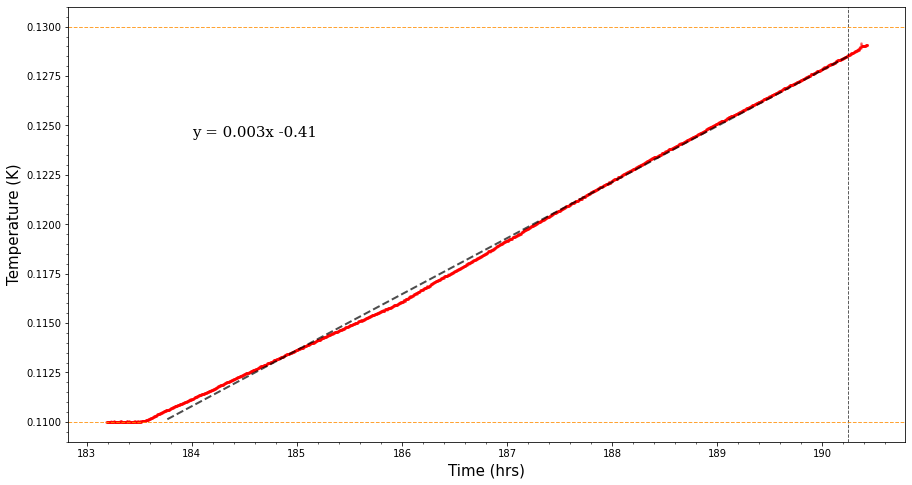

In [35]:
fig, ax = plt.subplots(figsize=(15,8))

i, j = 254700, 258497
k = 258400
temp = 0.11

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.3, s=3, label='100mK (FAA)')  
plt.axvline(time[k], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=temp, color='darkorange', alpha=0.8, linewidth=1, linestyle='--')
plt.axhline(y=0.13, color='darkorange', alpha=0.8, linewidth=1, linestyle='--')
plt.minorticks_on()
#plt.ylim(0.108,0.132)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')


# Cálculo de correlación y significancia con Scipy
t = time[255000:258400]
T = temp_FAA[255000:258400]
r, p = stats.pearsonr(t, T)
print(f"\nCorrelación Pearson: r={r}, p-value={p}")

# Ajuste lineal
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree, cov=True)
    results['polynomial'] = list(coeffs)
    return results

p = polyfit(t, T, 1)
print(p)


x = np.linspace(t.min(),t.max())
y = p['polynomial'][0][0]*x+p['polynomial'][0][1]

plt.plot(x,y, linestyle='--', alpha=0.7, linewidth=2, color = 'black')

plt.text(184,0.125, 
         'y = '+str(round(p['polynomial'][0][0],3))+'x '+str(round(p['polynomial'][0][1],2)), 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

No es lineal en realidad

#### Guardado de datos

In [37]:
data = {'Cycle':        ['First','First','First','Second','Second','Second'],
        'Control (mK)': ['90',   '100',  '110',  '90',    '100',   '110'],
        'Temperature (mK)':    [mu_90mk_1,mu_100mk_1,mu_110mk_1,
                        mu_90mk_2,mu_100mk_2,mu_110mk_2_clean],
        'STD (microK)':[sigma_90mk_1,sigma_100mk_1,sigma_110mk_1,
                        sigma_90mk_2,sigma_100mk_2,sigma_110mk_2_clean]}

table = pd.DataFrame(data)
table['Temperature (mK)'] = np.round(table['Temperature (mK)']*1000,3)
table['STD (microK)'] = np.round(table['STD (microK)']*1000000,2)
table = table.pivot_table(values= ['Temperature (mK)','STD (microK)'],
                  index=['Cycle', 'Control (mK)'])
display(table)
print('* STD de control a 110mk del segundo ciclo con el pico (microK):',
      np.round(sigma_110mk_2*1000000,2))


STD (microK)  Temperature (mK)
Cycle  Control (mK)                                
First  100                   4.81           100.000
       110                   4.34           110.001
       90                    5.97            90.001
Second 100                   4.32            99.998
       110                   4.37           110.001
       90                    6.50            90.001

* STD de control a 110mk del segundo ciclo con el pico (microK): 5.23


En la estabilidad del 110mk en el segundo control pasó lo del pico de datos que baja a 0,109K. En la tabla aparece el STD sin el pico, y abajo el con el pico

A notar que el control de 100mk es el único cuya media está por debajo del valor impuesto en ambos ciclados 